# Find Relationships Between Entities and Plot Diagram

To understand the relationship with the extracted entities from a corpus is a challange in the *natural language processing* world. To understand how to find the relationship you can read this notebook to get the idea. In this notebook we use the [spaCy](https://spacy.io/) and [networkx](https://networkx.org/) packages to identify and plot the relationship between the entities. 

To find the relationships we must go through some steps. The steps are:
* find the sentences and chop them 
* find the tokenized words
* find their roles in the sentences
* finally find relations. 

In [11]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

### Define sets of functions
These functions are used to tokenize, find words' roles, and relations in the text.


In [4]:
def printToken(token):
    print(token.text, token.dep_)

In [85]:
def appendChunk(original, chunk):
    return (original + ' ' + chunk)

In [71]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [7]:
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [90]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjecConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    #print(subject.strip(),",", relation.strip(),",", object.strip())
    return(subject.strip(), relation.strip(), object.strip())

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color = 'black', width = 1, linewidths = 1, node_size = 500, node_color = 'seagreen', alpha = 0.9,
           labels = {node: node for node in G.nodes()})
    plt.axis('off')
    plt.show

In [140]:
nlp = spacy.load("en_core_web_sm")

def get_sentences(text, nlp):
    doc = nlp(text)
    return [sent for sent in doc.sents]

In [129]:
text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

text2 = "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

In [109]:
def Process_Sentence(sentence, nlp):
    tokens = nlp(sentence)
    return processSubjectObjectPairs(tokens)

Greater compound
London nsubjpass
is auxpass
governed ROOT
by agent
the det
Mayor pobj
of prep
London pobj
and cc
the det
London compound
Assembly conj
. punct
London nsubjpass
is auxpass
located ROOT
in prep
the det
southeast pobj
of prep
England pobj
. punct
Westminster nsubjpass
is auxpass
located ROOT
in prep
London pobj
. punct
London nsubj
is ROOT
the det
biggest amod
city attr
in prep
Britain pobj
. punct
London nsubj
has ROOT
a det
population dobj
of prep
7,172,036 pobj
. punct


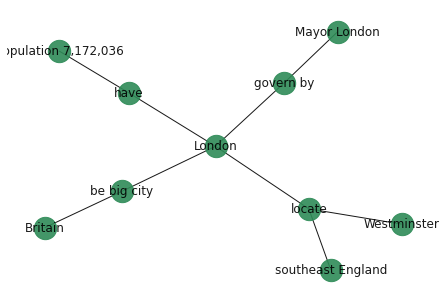

In [141]:
sentences = get_sentences(text2, nlp)

triples = []
for sentence in sentences:
    triples.append(Process_Sentence(sentence.text, nlp))

printGraph(triples)